# 신경망 기초 

우리가 텍스트를 분석함에 있어서 특히 감정분석을 하는 방법에는 단어사전에 의한 로지스틱 회귀분석 방법으로 감정을 분석하는 방법도 있지만, 딥러닝 방법을 이용해서
감정분석을 하는 방법도 있다. 딥러닝 방법에 의해서 즉 인공지능기반의 자연어 처리 기술을 이용하여 감정분석을 하기 위해선 신경망에 대한 기초적인 지식이 필요하기 때문에 신경망 기초실습을 하겠습니다.

오늘은 이진분류에 대해 알아보겠습니다.

참고 사이트 : https://www.tensorflow.org/tutorials?hl=ko

In [1]:
# 필요한 라이브러리 import 
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 데이터 준비

In [2]:
# 간단하게 이진분류 연습을 할거기 때문에 전체 샘플규모를 2만개 생성하고
# 테스트샘플과 벨류샘플을 각각 4천개를 생성했다.

n = 20000
ts = 4000
vs =4000


In [3]:
# 균일분포(0,2)에서 랜덤넘버를 생성하여 1.2 이상과 이하로 이진 분류데이터 생성  
x = np.random.uniform(0,2, n)
y=[]
for i in x:
  if i >1.2:
    y.append(1)
  else :
    y.append(0)


In [4]:
# 데이터에 대한 라벨 확인
df = pd.DataFrame(x)
df['class'] = y
df


,0,class
0,0.220967,0
1,0.007692,0
2,0.288182,0
3,1.445646,1
4,0.640993,0
...,...,...
19995,1.547476,1
19996,1.271730,1
19997,1.409167,1
19998,1.203089,1


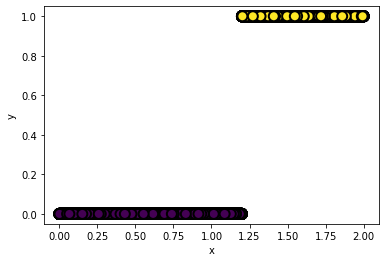

In [5]:
plt.scatter(x, y, marker='o', c=y, s=100, edgecolor="k", linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# 1.2보다 낮은것은 0, 큰것은 1에 배치됨

In [6]:
# train, test, validataion data로 분리 , 20000개의 데이터를 ts, vs 사이즈 4000개씩 분리 
# 20000 - 4000하고 16000 - 4000하니까 12000나옴
train_df, test_df = train_test_split(df, test_size=ts,random_state=1256)
train_df, val_df = train_test_split(train_df, test_size=vs,random_state=1256)
len(train_df)
len(val_df)

4000

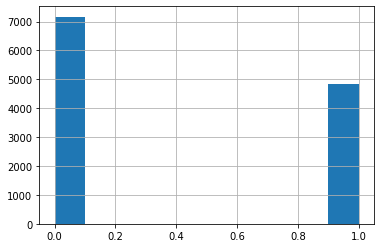

In [7]:
train_df['class'].hist()
# df['class'].hist()
# val_df['class'].hist()


In [8]:
train_df[:2]

,0,class
9787,1.842238,1
15246,0.252972,0


# 모델링

In [ ]:
# 입력데이터로 정리  
# y에는 class만 들어가겠쥬?
y_train = train_df.pop('class')
x_train = train_df
y_test = test_df.pop('class')
x_test = test_df
y_val = val_df.pop('class')
x_val = val_df
x_train

,0
9787,0.058915
15246,1.846492
17126,0.420920
14124,1.791348
6737,0.482416
...,...
926,1.364541
19414,0.954256
14489,1.088597
9058,0.185621


In [ ]:
# input_shape, 입력변수의 개수 확인 
train_features = np.array(train_df)
train_features.shape[-1]

1

In [ ]:
# 다층의 layer를 쌓아서 모델링, 훈련에 사용할 옵티마이저(optimizer)와 손실 함수를 선택 

model = keras.models.Sequential()
model.add(keras.layers.Dense(16, activation='relu', input_shape=(train_features.shape[-1],)))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',  # 0또는 1로 구분해주는 loss를 정의했다.
              metrics=['accuracy'])   # 측정은 accuracy로 하겠다.

# 시그모이드는 0~1값 출력 0.5보다 작으면 0, 크면 1
#이진분류분석을 하기위해 마지막 레이어는 시그모이드 함수를 정해줘야한다.

# 최적화를 무엇으로 할건지, 활성화 함수는 어떤걸 사용할건지, loss는 무엇으로 정의하며 
# metrics은 무엇을 할건지 모델링 단계에서 다 정해줘야한다. 
# 모델링 단계에서 레이어의 구성과 optimizser의 선택으로 인해 결과가 많이 달라짐


In [ ]:
#모델 요약해서 보기
model.summary()

# layer를 깊게 쌓으면 쌓을수록 더 복잡한 문제를 추론할 수 있고
# 복잡하면 할수록 우리가 추정해야하는 파라미터값은 많아진다.
# 파라미터가 많아진다는 것은 그만큼 데이터가 데이터가 많아져야한다는 뜻이다.

# 위와같은 모델에서는 321개를 추론하게 된다.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


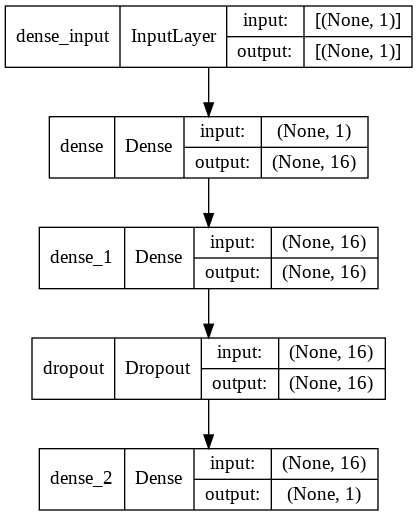

In [ ]:
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

# x값 1개 피쳐를 가지고 입력해서 16개로 증폭시키는 것이다. 
# 마지막 출력단계에선 다시 1개로 줄이는 과정이다.

# Training

In [1]:
# 그래서 이제 트레이닝 할건데, 트레이닝을 할땐 모델을 어떻게 저장할건지
# 기본 워킹디렉토리에 model.hdf5로 저장됨

# 모델 저장 설정
save_weights = tf.keras.callbacks.ModelCheckpoint("model.hdf5",
                                                  monitor='val_accuracy',
                                                  verbose=1,
                                                  save_best_only=True,
                                                  mode="max",
                                                  save_freq="epoch",
                                                  save_weights_only=True)

NameError: ignored

In [ ]:
# 모델 학습 및 필요 데이터 저장 
history = model.fit(x_train, y_train, validation_data=(x_val, y_val) ,
                    epochs=40, # 전체프로세스를 몇번 반복할건지
                    batch_size=256,  # 한 epochs를 돌때 데이터를 몇개씩 입력시킬건지
                                     # 배치값에 따라 추론의 정확도에 영향을 미친다!
                                     # 많은 배치를 실행시켜도 되는데 편의상 256정도로 설정
                    callbacks=[save_weights])  # 세이브하겠다?

# 원래는 에포크 1번당 20분씩 걸리는데 이번건 수치화 되어있는 
# 간단한 모델이기 때문에 1초도 안걸린다
# 에포크를 진행할때마다 loss는 줄고 accuracy는 증가하는 경향을 보임 00648 09679

Epoch 1/40
30/47 [==================>...........] - ETA: 0s - loss: 0.7453 - accuracy: 0.5658 
Epoch 00001: val_accuracy improved from -inf to 0.93625, saving model to model.hdf5
47/47 [==============================] - 1s 6ms/step - loss: 0.7274 - accuracy: 0.5845 - val_loss: 0.6670 - val_accuracy: 0.9362
Epoch 2/40
29/47 [=================>............] - ETA: 0s - loss: 0.6600 - accuracy: 0.6926
Epoch 00002: val_accuracy did not improve from 0.93625
47/47 [==============================] - 0s 3ms/step - loss: 0.6463 - accuracy: 0.7090 - val_loss: 0.5979 - val_accuracy: 0.8175
Epoch 3/40
33/47 [====================>.........] - ETA: 0s - loss: 0.5818 - accuracy: 0.7863
Epoch 00003: val_accuracy did not improve from 0.93625
47/47 [==============================] - 0s 2ms/step - loss: 0.5702 - accuracy: 0.7981 - val_loss: 0.5205 - val_accuracy: 0.8808
Epoch 4/40
28/47 [================>.............] - ETA: 0s - loss: 0.5187 - accuracy: 0.8404
Epoch 00004: val_accuracy did not improve 

# 평가

In [ ]:
# 이제 training한것을 가지고 이 모델이 잘적합 되었는지
# 평가하게 됨 = model.evaluate()

# 훈련된 이미지 분류기는 이 데이터셋에서 거의 99.9%의 정확도를 달성
loss, accuracy = model.evaluate(x_test,  y_test, verbose=2)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

125/125 - 0s - loss: 0.0207 - accuracy: 0.9962 - 273ms/epoch - 2ms/step
Loss:  0.020698564127087593
Accuracy:  0.9962499737739563


In [ ]:
# 학습간 저장된 데이터 확인  
history_dict = history.history
history_dict.keys()

# loss, accuracy는 트레닝 데이터에서 나온 데이터 값이고
# 'val_loss', 'val_accuracy'는 벨류데이션 데이터를 가지고 에포크마다 평가를 한 값이다.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

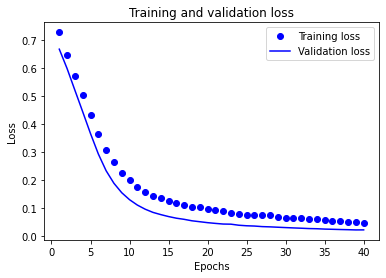

In [ ]:
# 손실과 정확도 도식 
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 40번의 에포크를 수행하면서 단계마다 트레이닝로스가 줄어듬
# 오히려 벨류데이션 로스가 더 낮음, 벨류데이션은 올라가는 순간이 존재함

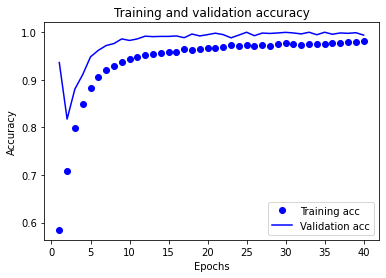

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

# 트레이닝 아큐레이시가 점점 증가, 벨류데이션 아큐레이시는 어느순간 일정함 하지만
# 일정하다가 곧 떨어지게 된다. 

# 이것을 계속 트레이닝 시키면 트레이닝 데이터에 적합은 되지만
# 일반적인 데이터에 적절하게 적용이 되지 않는 경우가 생긴다. 
# 그런 경우를 과적합(오버피팅)이라고 한다. 그래서 벨류데이션 데이터를 가지고
# 오버피팅이 되지않는 그 순간의 값을 사용하게 된다.

# 배포 

In [ ]:
# 이제 학습한 내용을 가지고 배포를 해야한다.

new_x = [-1, 0.3, 1.1, 1.2, 2]  # 이것은 임의의 데이터임 
                                # 임의의 데이터를 넣고 시도해볼수있음

# 앞서 만든 모델은 1.2보다 크면 1, 작으면 0으로 만드는 것이었음

In [ ]:
# 저장된 모델 호출 
model.load_weights('model.hdf5')

y_pred = model.predict( new_x)
print(np.round(y_pred).astype(int))

# 1.2보다 작은것 0, 큰것 1로 잘 들어간것을 알 수 있음.
# 정확하게 예측이 된것 같지만 1.2는 1이 아니죠 1.2보다 커야 1이니까요
# 정확하게 하면 1.2도 0값이 나오는게 맞다. 

# 어쨋든 우리가 모형을 만드는것이 99.7퍼센트의 정확성을 갖는 모델을
# 개발한것이기 때문에 아주 간단한 분류분석이지만 이와같이 오류가 있을수있다
# 여기서 말하는 오류는 1.2를 1로 나오게한것임 ㅇㅇ

[[0]
 [0]
 [0]
 [0]
 [1]]


그래서 감정분석의 문제를 딥러닝으로 생각해보면 모델링은 워드임베딩 방법으로 임베딩할 수 도있고 또는 더 발전된 방법을 사용하게 되면 우리가 센텐스임베딩을 통해서 조금 더 문맥속에서 단어의 의미를 식별하는 모델을 개발할수있지만, 지금 우리가 배운 수준은 워드임베딩 수준이기 때문에 워드를 임베딩해서 임베딩한 값을 가지고 우리가 로지스틱 회귀 한것처럼 호텔의 평가를 좋고 나쁨으로 다시 평가할수있는거죠 그러한 텍스트를 임베딩해서 수치화하고 수치화한 데이터를 가지고 딥러닝 모델에 입력해서 결과적으로 사람들이 입력한 텍스트가 긍정 혹은 부정인지 예측을 할 수 있다. 이와같이 추론하는 방법들을 배우기 위해서 신경망기초에 대한 부분을 실습을 한것이다. 아주간단한 실습이지만 의미있는 실습이다.